# interaction between the standing wave and the 3/1 field penetraion

In [1]:
from JuLab2Reveal import *
from IPython.display import HTML


In [2]:
HTML(headwrapper())

In [3]:
HTML(backgroundwrapper(img = "./pictures/background1.png") + positionadjust(obj = ".text_cell_render:last", position = "top: 12%; left:0%; width:100%;height:50%"))

## the RMP group

In [4]:
HTML(positionadjust(obj = ".text_cell_render:last", position = "top: 42%; left:30%; width:100%;height:50%;text-align:center"))

### Electro and magnetic coherence

In [5]:
HTML(backgroundwrapper()+positionadjust(obj = ".text_cell_render:last", position = "top: 1%; left:1%; width:100%;text-align:left"))

#### Vf vs Btheta

In [6]:
HTML(positionadjust(obj = ".text_cell_render:last", position = "top: 15%; left:1%;width:80%;text-align:left"))

In [7]:
HTML(r'<img src="./pictures/figure1.png" width="20" height="20" class="apreview"><style type="text/css"> .preview {position:fixed;top:0%;left:0%; width:100%; background:#fff;padding:20px;display:none;}</style>')

In [8]:
HTML(positionadjust(obj = ".apreview", position = "top: 1%; left:1%;width:10%"))

In [9]:
HTML(r'''<script>
$(function() {
    imagePreview();  
  });
this.imagePreview = function () {

    this.xOffset = 5;
    this.yOffset = -5;

    $(".apreview").hover(function (e) {
        this.t = this.title;
        this.title = ""; 
        this.imgSr = this.src;
        this.c = (this.t != "") ? "<br/>" + this.t : "";
        $("section:has(.apreview)").append("<p class='preview'><img src='" + this.imgSr + "' alt='Image preview' width='800' height='600' />" + this.c + "</p>");
        $(".preview")
            .css("top", (e.pageY + yOffset) + "px")
            .css("left", (e.pageX + xOffset) + "px")
            .css("z-index", 1)
            .fadeIn("fast");
    },
    function () {
        this.title = this.t;
        $(".preview").remove();
    });
    $(".apreview").mousemove(function (e) {  
        $(".preview")
            .css("top", (e.pageY - yOffset) + "px")
            .css("left", (e.pageX + xOffset) + "px");
    });
};
</script>''')

In [10]:
import sys
sys.path.append('/usr/local/mdsplus/python')
from MDSplus.connection import Connection
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import fig_method
import datetime
import matplotlib.pyplot as plt
from scipy import signal

In [11]:
shot = 1070698;

external_connect = Connection('222.20.94.136');
external_connect.openTree(tree = 'jtext',shot = shot)
def getdata( tag = '\\LPA_09', timeinv = [0,0.6]):
	temp = np.asarray(external_connect.get(tag));
	tempt = np.asarray(external_connect.get('dim_of('+tag +')'));
	t_start, t_end = fig_method.timeslice(tempt, timeinv[0], timeinv[1]);
	return temp[t_start:t_end], tempt[t_start:t_end]
timeinv = [0.3, 0.6];
brp, brpt = getdata(tag = '\\LPA_09', timeinv = timeinv);
brp1, brpt = getdata(tag = '\\LPA_10', timeinv = timeinv);
p,pt = getdata(tag = '\\LPA_13', timeinv = timeinv);
brp = brp - brp1;
vf, vft = getdata(tag = '\\LPA_08', timeinv = timeinv);

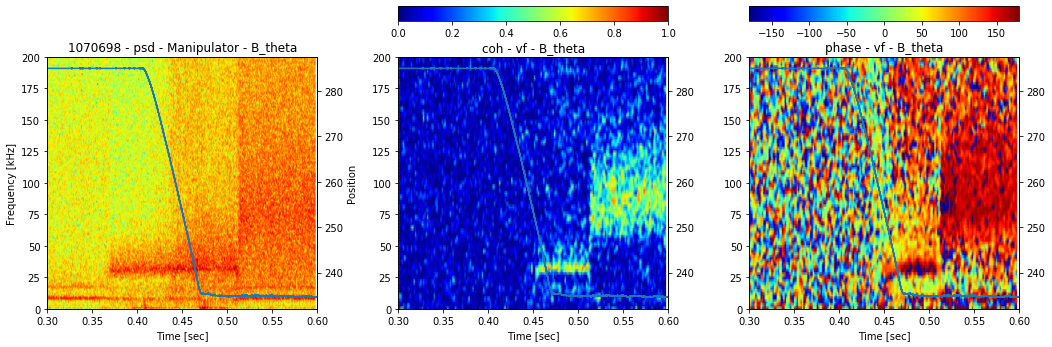

In [12]:
# %matplotlib widget
Fs = 200/(brpt[199]-brpt[0]);
f, tt, S = signal.spectrogram(brp, window = 'hamming', nperseg = 2*1024, fs = Fs);
tt = tt + timeinv[0];
fig = plt.figure(figsize = [15,5]);
ax1 = fig.add_axes([0.1,0.15,0.25,0.7]);
ax1.pcolormesh(tt, f/1000, np.log(S), cmap = 'jet', shading = 'gouraud')
ax1.set_ylabel('Frequency [kHz]')
ax1.set_xlabel('Time [sec]')
ax1.set_xlim(timeinv[0],timeinv[1]);
ax1.set_ylim(0,200);
ax1.set_title(str(shot)+' - psd - Manipulator - B_theta')
ax2 = ax1.twinx();
ax2.set_position([0.1,0.15,0.25,0.7])
ax2.plot(pt,50*p/8.3+235+50);
ax2.set_ylabel('Position')
# plt.show()

Fs = 200/(brpt[199]-brpt[0]);
A = fig_method.data_cal(Nwindow = 200, fs = Fs);
S, tt, f = A.cross_coeff(brp, vf);
tt = tt + timeinv[0];
# fig = plt.figure(figsize = [5,5]);
ax3 = fig.add_axes([0.425,0.15,0.25,0.7]);
line1 = ax3.pcolormesh(tt, f/1000, S, cmap = 'jet', shading = 'gouraud')
# ax3.set_ylabel('Frequency [kHz]')
ax3.set_xlabel('Time [sec]')
ax3.set_xlim(timeinv[0],timeinv[1]);
ax3.set_ylim(0,200);
ax3.set_title('coh - vf - B_theta')
line1.set_clim([0,1])
position=fig.add_axes([0.425,0.95,0.25,0.04])
fig.colorbar(line1,cax=position,orientation='horizontal')
ax4 = ax3.twinx();
ax4.set_position([0.425,0.15,0.25,0.7])
ax4.plot(pt,50*p/8.3+235+50);

# ax4.set_ylabel('Position')
# plt.show()

Fs = 200/(brpt[199]-brpt[0]);
A = fig_method.data_cal(Nwindow = 200, fs = Fs);
S, tt, f = A.cross_power(brp, vf);
tt = tt + timeinv[0];
# fig = plt.figure(figsize = [5,5]);
ax5 = fig.add_axes([0.75,0.15,0.25,0.7]);
line2 = ax5.pcolormesh(tt, f/1000, np.angle(S,deg = 1), cmap = 'jet', shading = 'gouraud')
# ax5.set_ylabel('Frequency [kHz]')
ax5.set_xlabel('Time [sec]')
ax5.set_xlim(timeinv[0],timeinv[1]);
ax5.set_ylim(0,200);
ax5.set_title('phase - vf - B_theta')
line2.set_clim([-180,180])
position=fig.add_axes([0.75,0.95,0.25,0.04])
fig.colorbar(line2,cax=position,orientation='horizontal')
ax6 = ax5.twinx();
ax6.set_position([0.75,0.15,0.25,0.7])
ax6.plot(pt,50*p/8.3+235+50);

# ax6.set_ylabel('Position')
plt.show()

In [13]:
HTML(positionadjust(obj = ".rendered_html:eq(-2)", position = "top:30%;left:0%;width:100%;"))

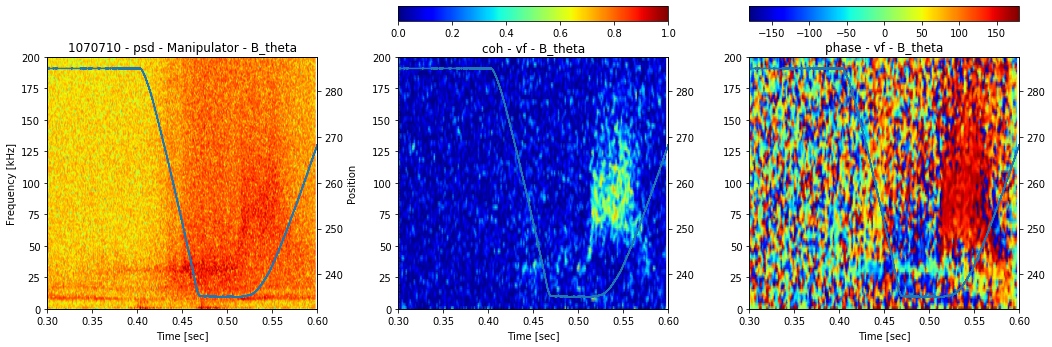

In [14]:
shot = 1070710;

external_connect = Connection('222.20.94.136');
external_connect.openTree(tree = 'jtext',shot = shot)
def getdata( tag = '\\LPA_09', timeinv = [0,0.6]):
	temp = np.asarray(external_connect.get(tag));
	tempt = np.asarray(external_connect.get('dim_of('+tag +')'));
	t_start, t_end = fig_method.timeslice(tempt, timeinv[0], timeinv[1]);
	return temp[t_start:t_end], tempt[t_start:t_end]
timeinv = [0.3, 0.6];
brp, brpt = getdata(tag = '\\LPA_09', timeinv = timeinv);
brp1, brpt = getdata(tag = '\\LPA_10', timeinv = timeinv);
p,pt = getdata(tag = '\\LPA_13', timeinv = timeinv);
brp = brp - brp1;
vf, vft = getdata(tag = '\\LPA_08', timeinv = timeinv);

# %matplotlib widget
Fs = 200/(brpt[199]-brpt[0]);
f, tt, S = signal.spectrogram(brp, window = 'hamming', nperseg = 2*1024, fs = Fs);
tt = tt + timeinv[0];
fig = plt.figure(figsize = [15,5]);
ax1 = fig.add_axes([0.1,0.15,0.25,0.7]);
ax1.pcolormesh(tt, f/1000, np.log(S), cmap = 'jet', shading = 'gouraud')
ax1.set_ylabel('Frequency [kHz]')
ax1.set_xlabel('Time [sec]')
ax1.set_xlim(timeinv[0],timeinv[1]);
ax1.set_ylim(0,200);
ax1.set_title(str(shot)+' - psd - Manipulator - B_theta')
ax2 = ax1.twinx();
ax2.set_position([0.1,0.15,0.25,0.7])
ax2.plot(pt,50*p/8.3+235+50);
ax2.set_ylabel('Position')
# plt.show()

Fs = 200/(brpt[199]-brpt[0]);
A = fig_method.data_cal(Nwindow = 200, fs = Fs);
S, tt, f = A.cross_coeff(brp, vf);
tt = tt + timeinv[0];
# fig = plt.figure(figsize = [5,5]);
ax3 = fig.add_axes([0.425,0.15,0.25,0.7]);
line1 = ax3.pcolormesh(tt, f/1000, S, cmap = 'jet', shading = 'gouraud')
# ax3.set_ylabel('Frequency [kHz]')
ax3.set_xlabel('Time [sec]')
ax3.set_xlim(timeinv[0],timeinv[1]);
ax3.set_ylim(0,200);
ax3.set_title('coh - vf - B_theta')
line1.set_clim([0,1])
position=fig.add_axes([0.425,0.95,0.25,0.04])
fig.colorbar(line1,cax=position,orientation='horizontal')
ax4 = ax3.twinx();
ax4.set_position([0.425,0.15,0.25,0.7])
ax4.plot(pt,50*p/8.3+235+50);

# ax4.set_ylabel('Position')
# plt.show()

Fs = 200/(brpt[199]-brpt[0]);
A = fig_method.data_cal(Nwindow = 200, fs = Fs);
S, tt, f = A.cross_power(brp, vf);
tt = tt + timeinv[0];
# fig = plt.figure(figsize = [5,5]);
ax5 = fig.add_axes([0.75,0.15,0.25,0.7]);
line2 = ax5.pcolormesh(tt, f/1000, np.angle(S,deg = 1), cmap = 'jet', shading = 'gouraud')
# ax5.set_ylabel('Frequency [kHz]')
ax5.set_xlabel('Time [sec]')
ax5.set_xlim(timeinv[0],timeinv[1]);
ax5.set_ylim(0,200);
ax5.set_title('phase - vf - B_theta')
line2.set_clim([-180,180])
position=fig.add_axes([0.75,0.95,0.25,0.04])
fig.colorbar(line2,cax=position,orientation='horizontal')
ax6 = ax5.twinx();
ax6.set_position([0.75,0.15,0.25,0.7])
ax6.plot(pt,50*p/8.3+235+50);

# ax6.set_ylabel('Position')
plt.show()

In [15]:
HTML(backgroundwrapper()+positionadjust(obj = ".rendered_html:eq(-2)", position = "top:30%;left:0%;width:100%;"))

### correlation between Mirnov coil and pick up coil

In [16]:
HTML(backgroundwrapper()+positionadjust(obj = ".text_cell_render:last", position = "top: 1%; left:1%; width:50%;text-align:left"))

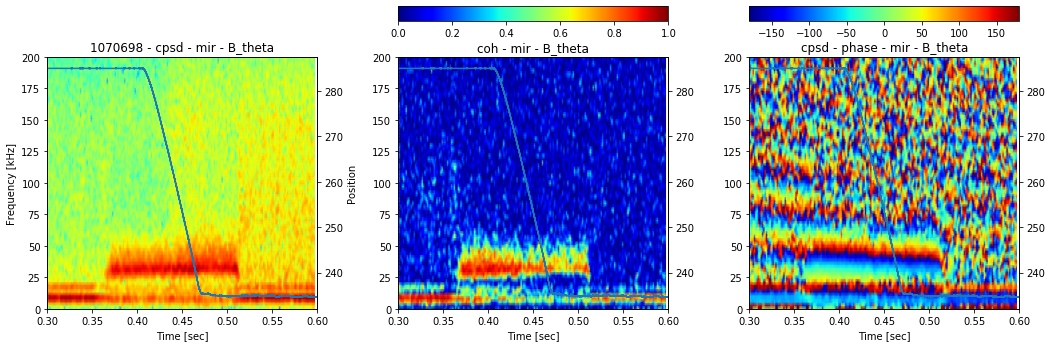

In [17]:
shot = 1070698;
external_connect = Connection('222.20.94.136');
external_connect.openTree(tree = 'jtext',shot = shot);
timeinv = [0.3, 0.6];
brp, brpt = getdata(tag = '\\LPA_09', timeinv = timeinv);
brp1, brpt = getdata(tag = '\\LPA_10', timeinv = timeinv);
p,pt = getdata(tag = '\\LPA_13', timeinv = timeinv);
brp = brp - brp1;
mir, mirt = getdata(tag = '\\ma_pol2_p01', timeinv = timeinv);
Fs = 200/(mirt[199]-mirt[0]);
Fs1 = 200/(brpt[199]-brpt[0]);
downsampleRate = np.round(Fs1/Fs,1);
downsampleIndex = np.arange(0,len(brpt),downsampleRate);
downsampleIndex = list(map(int, downsampleIndex ));
brp_down = brp[downsampleIndex];
brpt_down = brpt[downsampleIndex];

# %matplotlib widget
A = fig_method.data_cal(Nwindow = 200, fs = Fs);
Spsd, tt, f = A.cross_power(brp_down, mir[0:-1]);
tt = tt + timeinv[0];
fig = plt.figure(figsize = [15,5]);
ax1 = fig.add_axes([0.1,0.15,0.25,0.7]);
ax1.pcolormesh(tt, f/1000, np.log(np.abs(Spsd)), cmap = 'jet', shading = 'gouraud')
ax1.set_ylabel('Frequency [kHz]')
ax1.set_xlabel('Time [sec]')
ax1.set_xlim(timeinv[0],timeinv[1]);
ax1.set_ylim(0,200);
ax1.set_title(str(shot)+' - cpsd - mir - B_theta')
ax2 = ax1.twinx();
ax2.set_position([0.1,0.15,0.25,0.7])
ax2.plot(pt,50*p/8.3+235+50);
ax2.set_ylabel('Position')
# plt.show()

S, tt, f = A.cross_coeff(brp_down, mir[0:-1]);
tt = tt + timeinv[0];
# fig = plt.figure(figsize = [5,5]);
ax3 = fig.add_axes([0.425,0.15,0.25,0.7]);
line1 = ax3.pcolormesh(tt, f/1000, S, cmap = 'jet', shading = 'gouraud')
# ax3.set_ylabel('Frequency [kHz]')
ax3.set_xlabel('Time [sec]')
ax3.set_xlim(timeinv[0],timeinv[1]);
ax3.set_ylim(0,200);
ax3.set_title('coh - mir - B_theta')
line1.set_clim([0,1])
position=fig.add_axes([0.425,0.95,0.25,0.04])
fig.colorbar(line1,cax=position,orientation='horizontal')
ax4 = ax3.twinx();
ax4.set_position([0.425,0.15,0.25,0.7])
ax4.plot(pt,50*p/8.3+235+50);

# ax4.set_ylabel('Position')
# plt.show()

# fig = plt.figure(figsize = [5,5]);
ax5 = fig.add_axes([0.75,0.15,0.25,0.7]);
line2 = ax5.pcolormesh(tt, f/1000, np.angle(Spsd,deg = 1), cmap = 'jet', shading = 'gouraud')
# ax5.set_ylabel('Frequency [kHz]')
ax5.set_xlabel('Time [sec]')
ax5.set_xlim(timeinv[0],timeinv[1]);
ax5.set_ylim(0,200);
ax5.set_title('cpsd - phase - mir - B_theta')
line2.set_clim([-180,180])
position=fig.add_axes([0.75,0.95,0.25,0.04])
fig.colorbar(line2,cax=position,orientation='horizontal')
ax6 = ax5.twinx();
ax6.set_position([0.75,0.15,0.25,0.7])
ax6.plot(pt,50*p/8.3+235+50);

# ax6.set_ylabel('Position')
plt.show()

In [18]:
HTML(positionadjust(obj = ".rendered_html:eq(-2)", position = "top:25%;left:0%;width:100%;"))

### Phase jump of BAE

In [19]:
HTML(backgroundwrapper()+positionadjust(obj = ".text_cell_render:last", position = "top: 1%; left:1%; width:50%;text-align:left"))

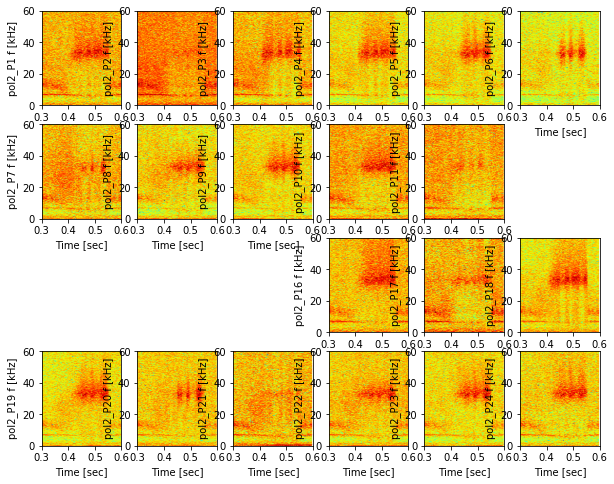

In [20]:
shot = 1071527;
external_connect = Connection('222.20.94.136');
external_connect.openTree(tree = 'jtext',shot = shot)
mirlist = ['\\ma_pol2_p0{}'.format(i) for i in range(1,10,2)];
mirlist.extend(['\\ma_pol2_p{}'.format(i) for i in range(10,49,2)]);
# mirlist = ['\\ma_tor1_p0{}'.format(i) for i in range(1,10,1)];
# mirlist.extend(['\\ma_tor1_p{}'.format(i) for i in range(10,17,1)]);
# mirlist = mirlist[0:1];
k = 1
fig = plt.figure(figsize = [10,8]);
for N1 in mirlist:
    try:
      temp, tempt = getdata(tag = N1, timeinv = timeinv);
      Fs = 200/(tempt[200]-tempt[0]);
      f, tt, S = signal.spectrogram(temp, nperseg = 2*1024, fs = Fs);
      tt = tt + timeinv[0];
      ax1 = fig.add_subplot(4,6,k);
      line1 = ax1.pcolormesh(tt, f/1000, np.log(abs(S)), cmap = 'jet', shading = 'gouraud')
      ax1.set_ylabel('pol2_P{} f [kHz]'.format(k));
      ax1.set_xlabel('Time [sec]')
      ax1.set_xlim(timeinv[0],timeinv[1]);
      ax1.set_ylim(0,60);
#       line1.set_clim()
    except:
        pass
#         print('Mir {} error'.format(k))
    k = k+1;
plt.show()

In [21]:
HTML(positionadjust(obj = ".rendered_html:eq(-2)", position = "top:35%;left:0%;width:100%;"))

In [22]:
shot = 1071527;
external_connect = Connection('222.20.94.136');
external_connect.openTree(tree = 'jtext',shot = shot)
mirlist = ['\\ma_tor1_p0{}'.format(i) for i in range(1,10,1)];
mirlist.extend(['\\ma_tor1_p{}'.format(i) for i in range(10,17,1)]);
# mirlist = mirlist[0:1];
tor1_siglist = list(range(len(mirlist)+1));
k = 1
for N1 in mirlist:
    try:
      temp, tempt = getdata(tag = N1, timeinv = timeinv);
      tor1_siglist[0] = tempt;
      tor1_siglist[k] = temp;
    except:
        pass
#         print('Mir {} error'.format(k))
    k = k+1;

mirlist = ['\\ma_pol2_p0{}'.format(i) for i in range(1,10,1)];
mirlist.extend(['\\ma_pol2_p{}'.format(i) for i in range(10,49,1)]);
pol2_siglist = list(range(len(mirlist)+1));
k = 1
for N1 in mirlist:
    try:
      temp, tempt = getdata(tag = N1, timeinv = timeinv);
      pol2_siglist[0] = tempt;
      pol2_siglist[k] = temp;
    except:
        pass
#         print('Mir {} error'.format(k))
    k = k+1;

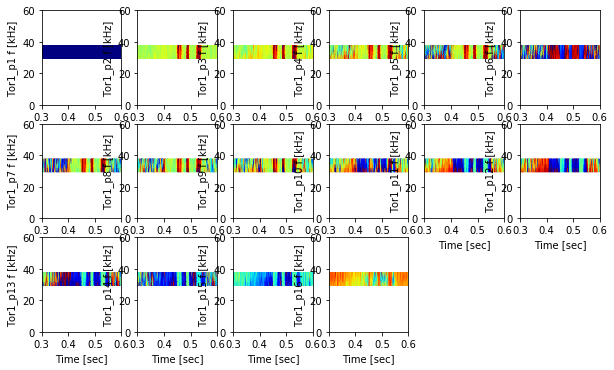

In [23]:
fig = plt.figure(figsize = [10,8]);
Fs = 200/(tempt[200]-tempt[0]);
temp = [];
A = fig_method.data_cal(Nwindow = 200, fs = Fs)
for N1 in range(1, len(tor1_siglist)):
#     try:
      S, tt, f = A.cross_power(tor1_siglist[1], tor1_siglist[N1]);
      tt = tt + timeinv[0];
      ax1 = fig.add_subplot(4,6,N1);
      frange = np.where((f > 28e03) & (f < 38e03));
      line1 = ax1.pcolormesh(tt, f[frange]/1000, np.angle(S[frange,:][0],deg = 1), cmap = 'jet', shading = 'gouraud')
#       line1 = ax1.pcolormesh(tt, f/1000, np.log(np.abs(S)), cmap = 'jet', shading = 'gouraud')  
      ax1.set_ylabel('Tor1_p{} f [kHz]'.format(N1));
      ax1.set_xlabel('Time [sec]');
      ax1.set_xlim(timeinv[0],timeinv[1]);
      ax1.set_ylim(0,60);
#       line1.set_clim(-180,180)
#     except:
#        pass
#         print('Mir {} error'.format(k))

plt.show()

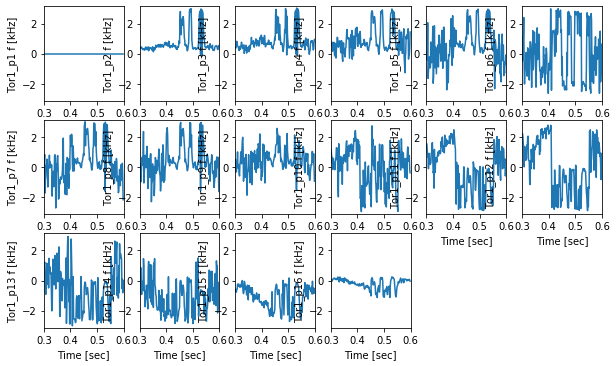

In [24]:
fig = plt.figure(figsize = [10,8]);
Fs = 200/(tempt[200]-tempt[0]);
temp = [];
A = fig_method.data_cal(Nwindow = 200, fs = Fs)
for N1 in range(1, len(tor1_siglist)):
#     try:
      S, tt, f = A.cross_power(tor1_siglist[1], tor1_siglist[N1]);
      tt = tt + timeinv[0];
      ax1 = fig.add_subplot(4,6,N1);
      frange = np.where((f > 28e03) & (f < 38e03));
      phase_t = np.mean(np.angle(S[frange,:][0]),axis = 0);
      line1 = ax1.plot(tt, phase_t)
#       line1 = ax1.pcolormesh(tt, f/1000, np.log(np.abs(S)), cmap = 'jet', shading = 'gouraud')  
      ax1.set_ylabel('Tor1_p{} f [kHz]'.format(N1));
      ax1.set_xlabel('Time [sec]');
      ax1.set_xlim(timeinv[0],timeinv[1]);
      ax1.set_ylim(-np.pi,np.pi);
#       line1.set_clim(-180,180)
#     except:
#         pass
#         print('Mir {} error'.format(k))

plt.show()

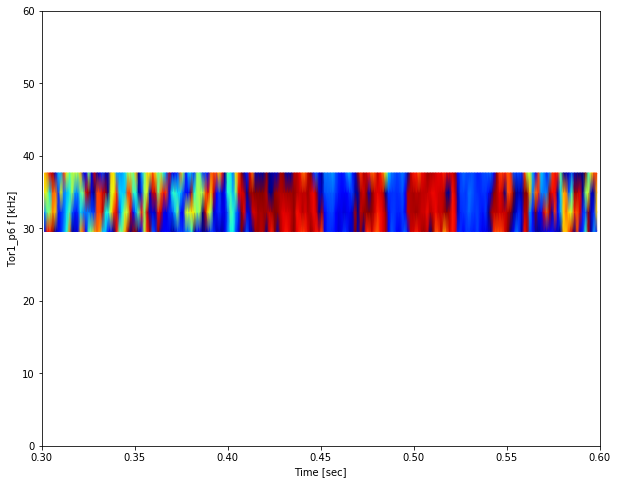

In [25]:
#%matplotlib widget
fig = plt.figure(figsize = [10,8]);
Fs = 200/(tempt[200]-tempt[0]);
temp = [];
A = fig_method.data_cal(Nwindow = 200, fs = Fs)
for N1 in range(6, 7):
#     try:
      S, tt, f = A.cross_power(tor1_siglist[1], tor1_siglist[N1]);
      tt = tt + timeinv[0];
      ax1 = fig.add_subplot(1,1,1);
      frange = np.where((f > 28e03) & (f < 38e03));
      line1 = ax1.pcolormesh(tt, f[frange]/1000, np.angle(S[frange,:][0],deg = 1), cmap = 'jet', shading = 'gouraud')
#       line1 = ax1.pcolormesh(tt, f/1000, np.log(np.abs(S)), cmap = 'jet', shading = 'gouraud')  
      ax1.set_ylabel('Tor1_p{} f [kHz]'.format(N1));
      ax1.set_xlabel('Time [sec]');
      ax1.set_xlim(timeinv[0],timeinv[1]);
      ax1.set_ylim(0,60);
#       line1.set_clim(-180,180)
#     except:
#         pass
#         print('Mir {} error'.format(k))

plt.show()

In [26]:
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
phase_t = list(range(len(mode_region)));
power_t = list(range(len(mode_region)));
# Add traces, one for each slider step
for step in range(len(mode_region)):
    temp_phase = [];
    temp_power = [];
    for N1 in range(1, len(tor1_siglist)):
      Fs = 200/(tor1_siglist[0][200]-tor1_siglist[0][0]);
      A = fig_method.data_cal(Nwindow = 200, fs = Fs)
      S, tt, f = A.cross_power(tor1_siglist[1], tor1_siglist[N1]);
      tt = tt + timeinv[0];
      frange = np.where((f > 28e03) & (f < 38e03));
      trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
      temp_phase.append(np.mean(np.angle(np.transpose(np.transpose(S[frange])[trange]))));  
    
      f, tt, S = signal.spectrogram(tor1_siglist[N1], nperseg = 2*1024, fs = Fs);
      tt = tt + timeinv[0];
      frange = np.where((f > 28e03) & (f < 38e03));
      trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
      temp_power.append(np.mean(np.abs(np.transpose(np.transpose(S[frange])[trange])))); 
    phase_t[step] = temp_phase;
    power_t[step] = temp_power;

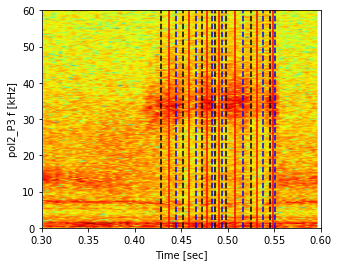

In [27]:
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
fig = plt.figure(figsize = [5,4]);
ax1 = fig.add_subplot(1,1,1);
Fs = 200/(tor1_siglist[0][200]-tor1_siglist[0][0]);
f, tt, S = signal.spectrogram(tor1_siglist[11], nperseg = 2*1024, fs = Fs);
tt = tt + timeinv[0];
ax1.pcolormesh(tt, f/1000, np.log(abs(S)), cmap = 'jet', shading = 'gouraud')
for step in range(len(mode_region)):
      timecenter = (mode_region[step][0] + mode_region[step][1])/2;
      ax1.plot([mode_region[step][0],mode_region[step][0]],[0,60],'k--')
      ax1.plot([mode_region[step][1],mode_region[step][1]],[0,60],'b--')
      ax1.plot([timecenter,timecenter],[0,60],'r')
ax1.set_ylabel('pol2_P{} f [kHz]'.format(3));
ax1.set_xlabel('Time [sec]')
ax1.set_xlim(timeinv[0],timeinv[1]);
ax1.set_ylim(0,60);
plt.show()

In [28]:
HTML(backgroundwrapper()+positionadjust(obj = ".rendered_html:eq(-2)", position = "top:10%;left:0%;width:45%;"))

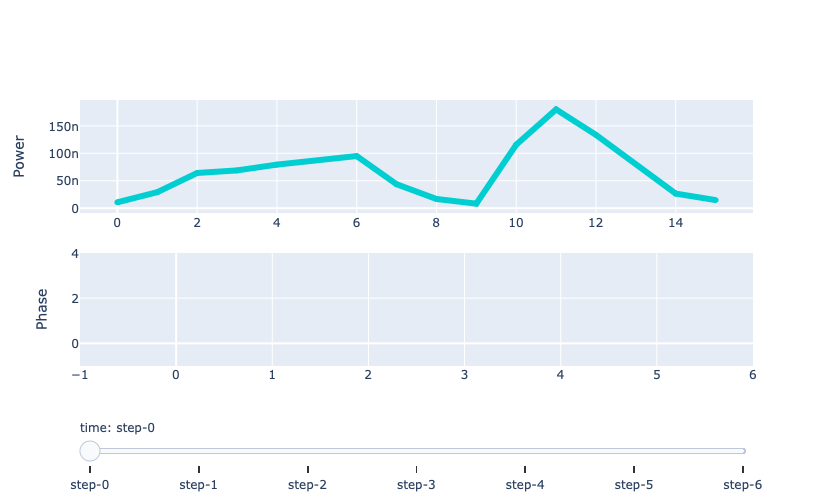

In [29]:
import plotly.offline as plo
from plotly.subplots import make_subplots
import plotly.graph_objs as go

plo.init_notebook_mode();
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
fig = make_subplots(
    rows=2, cols=1)
for step in range(len(mode_region)):
    timecenter = (mode_region[step][0] + mode_region[step][1])/2;
    temp = np.arange(0,16,1)
    temp1 = np.where(((temp != 5) & (temp != 13)));
    x = temp[temp1]
    y = np.asarray(power_t[step])[temp1];
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="t = {:.4f}".format(timecenter),
            x=x,
            y=y,
            mode = "lines+markers"),row=1, col=1)
for step in range(len(mode_region)):
    timecenter = (mode_region[step][0] + mode_region[step][1])/2;
    temp = np.arange(0,16,1)
    temp1 = np.where(((temp != 5) & (temp != 13)));
    x = temp[temp1]
    y = np.asarray(phase_t[step])[temp1];
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="t = {:.4f}".format(timecenter),
            x=x,
            y=y,
            mode = "lines+markers"),row=2, col=1)

# fig.data[0].visible = True
fig.data[len(mode_region)-1].visible = True

steps = []
for i in range(len(fig.data)//2):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    step["args"][0]["visible"][i+len(mode_region)] = True
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "time: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)
fig['layout']['yaxis']['title']['text'] = 'Power';
fig['layout']['yaxis2']['title']['text'] = 'Phase';
fig['layout']['width'] = 500;
fig['layout']['height'] = 500;
fig.show()

In [30]:
HTML(positionadjust(obj = ".rendered_html:eq(-2)", position = "top:5%;left:50%;width:45%;"))

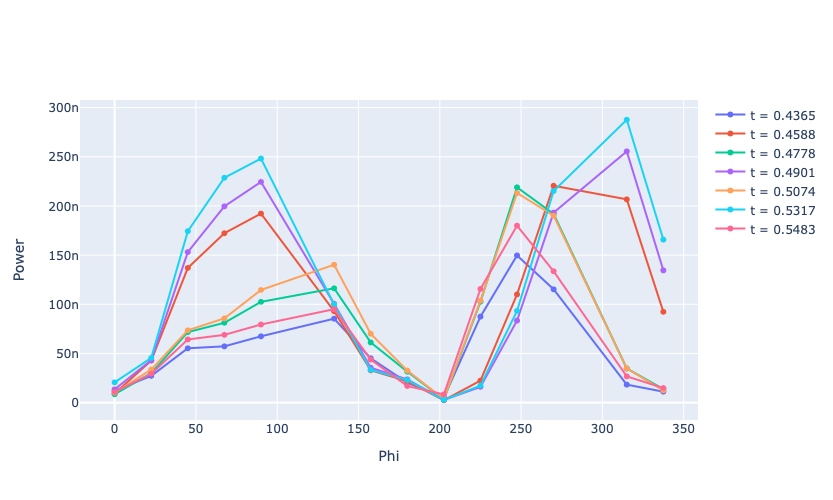

In [31]:
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
fig = go.Figure()
for step in range(len(mode_region)):
    timecenter = (mode_region[step][0] + mode_region[step][1])/2;
    temp = np.arange(0,16,1)
    temp1 = np.where(((temp != 5) & (temp != 13)));
    x = temp[temp1]/16*360;
    y = np.asarray(power_t[step])[temp1];
    fig.add_trace(
        go.Scatter(
            line=dict(width=2),
            name="t = {:.4f}".format(timecenter),
            x=x,
            y=y))
fig['layout']['width'] = 700;
fig['layout']['height'] = 500;
fig['layout']['xaxis']['title']['text'] = 'Phi';
fig['layout']['yaxis']['title']['text'] = 'Power';
fig.show()

In [32]:
HTML(backgroundwrapper()+positionadjust(obj = ".rendered_html:eq(-2)", position = "top:20%;left:0%;width:100%;"))

In [33]:
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
phase_t = list(range(len(mode_region)));
power_t = list(range(len(mode_region)));
# Add traces, one for each slider step
for step in range(len(mode_region)):
    temp_phase = [];
    temp_power = [];
    for N1 in range(1, len(pol2_siglist)):
        try:
           Fs = 200/(pol2_siglist[0][200]-pol2_siglist[0][0]);
           A = fig_method.data_cal(Nwindow = 200, fs = Fs)
           S, tt, f = A.cross_power(pol2_siglist[1], pol2_siglist[N1]);
           tt = tt + timeinv[0];
           frange = np.where((f > 28e03) & (f < 38e03));
           trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
           temp_phase.append(np.mean(np.angle(np.transpose(np.transpose(S[frange])[trange]))));  
    
           f, tt, S = signal.spectrogram(pol2_siglist[N1], nperseg = 2*1024, fs = Fs);
           tt = tt + timeinv[0];
           frange = np.where((f > 28e03) & (f < 38e03));
           trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
           temp_power.append(np.mean(np.abs(np.transpose(np.transpose(S[frange])[trange]))));
        except:
            temp_phase.append(0);
            temp_power.append(0);
    phase_t[step] = temp_phase;
    power_t[step] = temp_power;

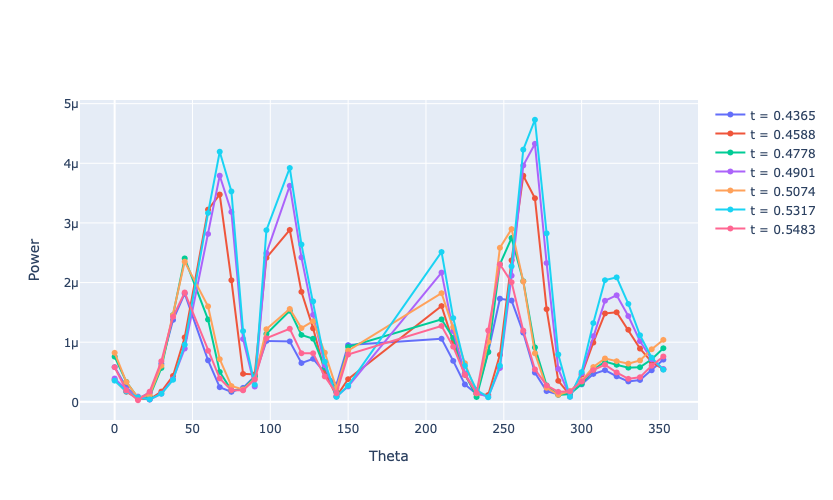

In [34]:
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
fig = go.Figure()
for step in range(len(mode_region)):
    timecenter = (mode_region[step][0] + mode_region[step][1])/2;
    temp = np.arange(0,48,1)
    temp1 = temp[list(range(0,7)) + list(range(8,14)) + list(range(15,21)) +list(range(28,48))]
    x = temp[temp1]*360/48;
    y = np.asarray(power_t[step])[temp1];
    fig.add_trace(
        go.Scatter(
            line=dict(width=2),
            name="t = {:.4f}".format(timecenter),
            x=x,
            y=y,
            mode = "markers+lines"))
fig['layout']['width'] = 700;
fig['layout']['height'] = 500;
fig['layout']['xaxis']['title']['text'] = 'Theta';
fig['layout']['yaxis']['title']['text'] = 'Power';
fig.show()

In [35]:
HTML(backgroundwrapper()+positionadjust(obj = ".rendered_html:eq(-2)", position = "top:10%;left:0%;width:100%;"))

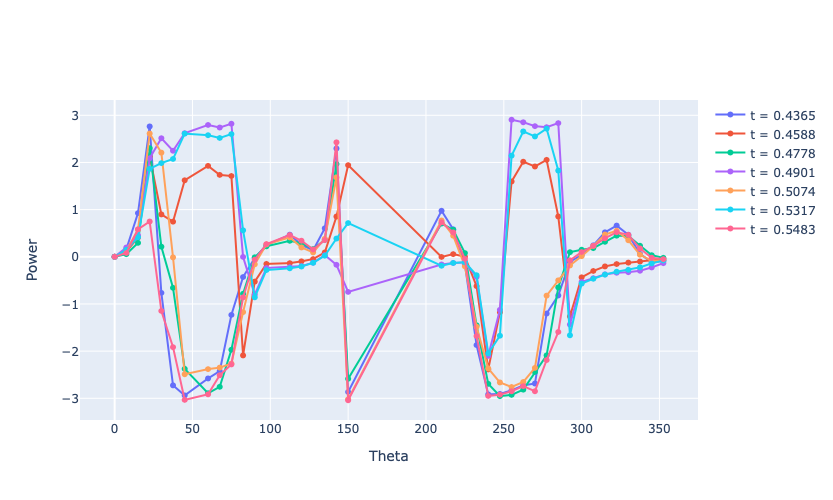

In [36]:
mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
fig = go.Figure()
for step in range(len(mode_region)):
    timecenter = (mode_region[step][0] + mode_region[step][1])/2;
    temp = np.arange(0,48,1)
    temp1 = temp[list(range(0,7))+ list(range(8,14)) + list(range(15,21)) +list(range(28,48))]
    x = temp[temp1]*360/48
    y = np.asarray(phase_t[step])[temp1];
    fig.add_trace(
        go.Scatter(
            line=dict(width=2),
            name="t = {:.4f}".format(timecenter),
            x=x,
            y=y,
            mode = "markers+lines"))
fig['layout']['width'] = 700;
fig['layout']['height'] = 500;
fig['layout']['xaxis']['title']['text'] = 'Theta';
fig['layout']['yaxis']['title']['text'] = 'Power';
fig.show()

In [37]:
def getdata(external_connect, tag = '\\LPA_09', timeinv = [0,0.6]):
    temp = np.asarray(external_connect.get(tag));
    tempt = np.asarray(external_connect.get('dim_of('+tag +')'));
    t_start, t_end = fig_method.timeslice(tempt, timeinv[0], timeinv[1]);
    return temp[t_start:t_end], tempt[t_start:t_end]

def caldata(shot = 1072021,mode_region = [[0.42,0.44]],finv = [28e03, 38e03]):
    timeinv = [0.3,0.6];
    external_connect = Connection('222.20.94.136');
    external_connect.openTree(tree = 'jtext',shot = shot)
    mirlist = ['\\ma_tor1_p0{}'.format(i) for i in range(1,10,1)];
    mirlist.extend(['\\ma_tor1_p{}'.format(i) for i in range(10,17,1)]);
    # mirlist = mirlist[0:1];
    tor1_siglist = list(range(len(mirlist)+1));
    k = 1;
    for N1 in mirlist:
        try:
            temp, tempt = getdata(external_connect = external_connect, tag = N1, timeinv = timeinv);
            tor1_siglist[0] = tempt;
            tor1_siglist[k] = temp;
        except:
            pass
#             print('Mir {} error'.format(k));
        k = k+1;
    mirlist = ['\\ma_pol2_p0{}'.format(i) for i in range(1,10,1)];
    mirlist.extend(['\\ma_pol2_p{}'.format(i) for i in range(10,49,1)]);
    pol2_siglist = list(range(len(mirlist)+1));
    k = 1
    for N1 in mirlist:
        try:
            temp, tempt = getdata(external_connect = external_connect, tag = N1, timeinv = timeinv);
            pol2_siglist[0] = tempt;
            pol2_siglist[k] = temp;
        except:
            pass
#             print('Mir {} error'.format(k));
        k = k+1;
    
    phase_t1 = list(range(len(mode_region)));
    power_t1 = list(range(len(mode_region)));
    # Add traces, one for each slider step
    for step in range(len(mode_region)):
        temp_phase = [];
        temp_power = [];
        for N1 in range(1, len(tor1_siglist)):
            Fs = 200/(tor1_siglist[0][200]-tor1_siglist[0][0]);
            A = fig_method.data_cal(Nwindow = 200, fs = Fs)
            S, tt, f = A.cross_power(tor1_siglist[1], tor1_siglist[N1]);
            tt = tt + timeinv[0];
            frange = np.where((f > finv[0]) & (f < finv[1]));
            trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
            temp_phase.append(np.mean(np.angle(np.transpose(np.transpose(S[frange])[trange]))));  
          
            f, tt, S = signal.spectrogram(tor1_siglist[N1], nperseg = 2*1024, fs = Fs);
            tt = tt + timeinv[0];
            frange = np.where((f > finv[0]) & (f < finv[1]));
            trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
            temp_power.append(np.mean(np.abs(np.transpose(np.transpose(S[frange])[trange])))); 
        phase_t1[step] = temp_phase;
        power_t1[step] = temp_power;

    # mode_region = [[0.4285, 0.4444], [0.4517, 0.4660], [0.4723, 0.4834], [0.4867, 0.4936], [0.4986, 0.5162], [0.5253, 0.5381], [0.5458, 0.5508]];
    phase_t2 = list(range(len(mode_region)));
    power_t2 = list(range(len(mode_region)));
    # Add traces, one for each slider step
    for step in range(len(mode_region)):
        temp_phase = [];
        temp_power = [];
        for N1 in range(1, len(pol2_siglist)):
            try:
                Fs = 200/(pol2_siglist[0][200]-pol2_siglist[0][0]);
                A = fig_method.data_cal(Nwindow = 200, fs = Fs)
                S, tt, f = A.cross_power(pol2_siglist[1], pol2_siglist[N1]);
                tt = tt + timeinv[0];
                frange = np.where((f > finv[0]) & (f < finv[1]));
                trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
                temp_phase.append(np.mean(np.angle(np.transpose(np.transpose(S[frange])[trange]))));  
        
                f, tt, S = signal.spectrogram(pol2_siglist[N1], nperseg = 2*1024, fs = Fs);
                tt = tt + timeinv[0];
                frange = np.where((f > finv[0]) & (f < finv[1]));
                trange = np.where((tt > mode_region[step][0]) & (tt < mode_region[step][1]));
                temp_power.append(np.mean(np.abs(np.transpose(np.transpose(S[frange])[trange]))));
            except:
                temp_phase.append(0);
                temp_power.append(0);
        phase_t2[step] = temp_phase;
        power_t2[step] = temp_power;
    return phase_t1, power_t1, phase_t2, power_t2

In [38]:
phase_t1, power_t1, phase_t2, power_t2 = [],[],[],[];
name = [];

In [39]:
shot = 1071566;
mode_region = [[0.40,0.41],[0.41,0.42],[0.42,0.43]]
temp1, temp2, temp3, temp4 = caldata(shot = shot, mode_region = mode_region);
phase_t1.append(temp1);
power_t1.append(temp2);
phase_t2.append(temp3);
power_t2.append(temp4);
name.append("#" + str(shot));

In [40]:
shot = 1071566;
mode_region = [[0.465,0.48], [0.48,0.50]];
finv = [35e03, 45e03];
temp1, temp2, temp3, temp4 = caldata(shot = shot,mode_region = mode_region, finv = finv);
phase_t1.append(temp1);
power_t1.append(temp2);
phase_t2.append(temp3);
power_t2.append(temp4);
name.append("#" + str(shot));

### 3/1 penetration to 2/1 penetraton

In [41]:
HTML(backgroundwrapper()+positionadjust(obj = ".text_cell_render:last", position = "top: 1%; left:1%; width:90%;text-align:left"))

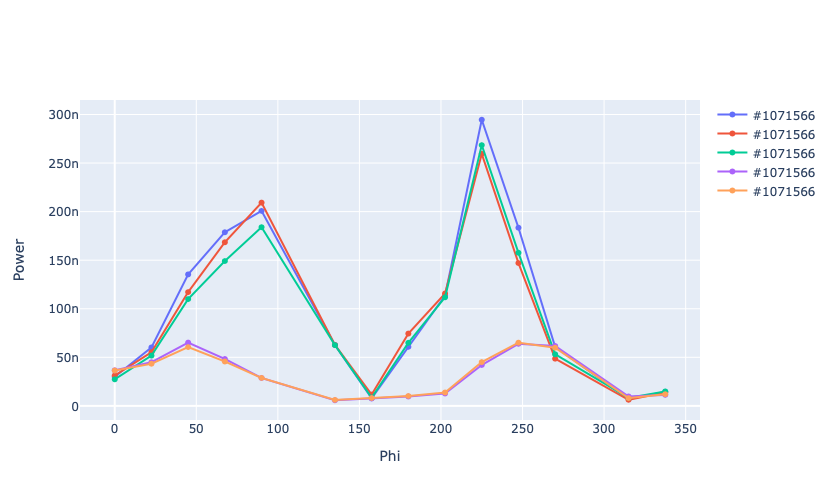

In [42]:
fig = go.Figure()
for shotnumber in range(len(name)):
    for step in range(len(power_t1[shotnumber])):
#         timecenter = (mode_region[step][0] + mode_region[step][1])/2;
        temp = np.arange(0,16,1)
        temp1 = np.where(((temp != 5) & (temp != 13)));
        x = temp[temp1]/16*360;
        y = np.asarray(power_t1[shotnumber][step])[temp1];
        fig.add_trace(
            go.Scatter(
                line=dict(width=2),
                name=name[shotnumber],
                x=x,
                y=y))
fig['layout']['width'] = 700;
fig['layout']['height'] = 500;
fig['layout']['xaxis']['title']['text'] = 'Phi';
fig['layout']['yaxis']['title']['text'] = 'Power';
fig.show()

In [43]:
HTML(positionadjust(obj = ".rendered_html:eq(-2)", position = "top:25%;left:0%;width:100%;"))

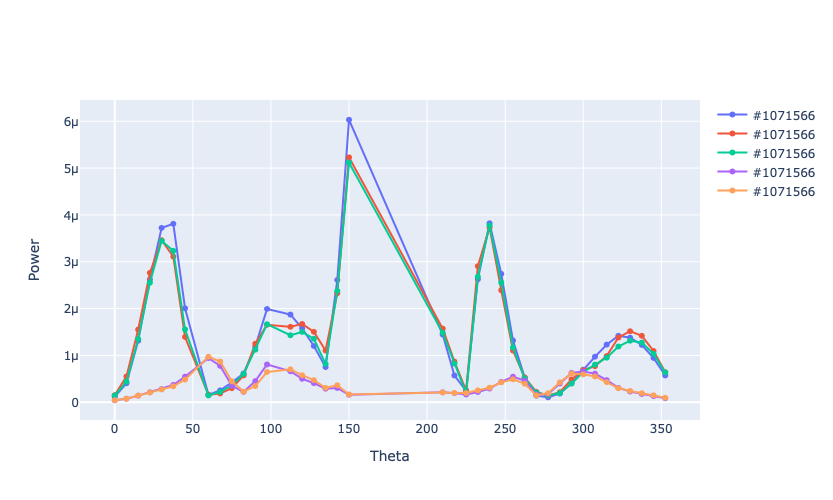

In [44]:
fig = go.Figure()
for shotnumber in range(len(name)):
    for step in range(len(power_t1[shotnumber])):
        temp = np.arange(0,48,1)
        temp1 = temp[list(range(0,7)) + list(range(8,14)) + list(range(15,21)) +list(range(28,48))]
        x = temp[temp1]*360/48;
        y = np.asarray(power_t2[shotnumber][step])[temp1];
        fig.add_trace(
            go.Scatter(
                line=dict(width=2),
                name=name[shotnumber],
                x=x,
                y=y,
                mode = "markers+lines"))
fig['layout']['width'] = 700;
fig['layout']['height'] = 500;
fig['layout']['xaxis']['title']['text'] = 'Theta';
fig['layout']['yaxis']['title']['text'] = 'Power';
fig.show()

In [45]:
HTML(backgroundwrapper()+positionadjust(obj = ".rendered_html:eq(-2)", position = "top:10%;left:0%;width:100%;"))

<font size="8" color="#dd0000"># Thanks for attention</font><br /> 

In [46]:
HTML(r'''<script>$("section:last").attr("data-background-iframe" ,"https://static.iter.org/com/360/calendar/2020-05/");$("section:last").attr("data-background-size" ,"98%")</script>''' + positionadjust(obj = ".text_cell_render:last", position = "top: 12%; left:0%; width:100%;height:50%"))

In [47]:
HTML(tailwrapper())